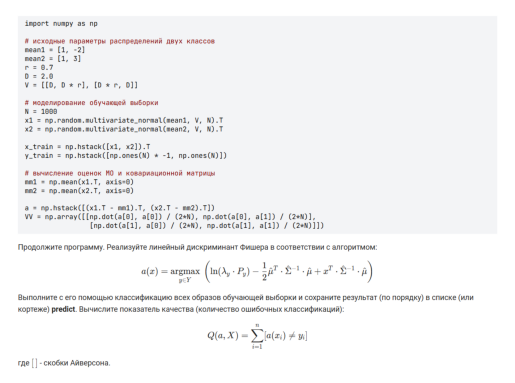

In [1]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('../img/3_6_1.png')  # Загрузите изображение, указав путь к файлу.
plt.imshow(img)  # Отобразите изображение.
plt.axis('off')  # Отключите отображение осей.
plt.show()

In [4]:
import numpy as np

np.random.seed(0)

# исходные параметры распределений двух классов
mean1 = [1, -2]
mean2 = [1, 3]
r = 0.7
D = 2.0
V = [[D, D * r], [D * r, D]]

# моделирование обучающей выборки
N = 1000
x1 = np.random.multivariate_normal(mean1, V, N).T
x2 = np.random.multivariate_normal(mean2, V, N).T

x_train = np.hstack([x1, x2]).T
y_train = np.hstack([np.ones(N) * -1, np.ones(N)])

# вычисление оценок МО и ковариационной матрицы
mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)

a = np.hstack([(x1.T - mm1).T, (x2.T - mm2).T])
VV = np.array([[np.dot(a[0], a[0]) / (2*N), np.dot(a[0], a[1]) / (2*N)],
                [np.dot(a[1], a[0]) / (2*N), np.dot(a[1], a[1]) / (2*N)]])

fischer = lambda x, mm: np.log(1/2) - 0.5 * mm.T @ np.linalg.inv(VV) @ mm + x.T @ np.linalg.inv(VV) @ mm
predict = [] # список классифицирующих образов
for X in x_train:
    s = np.argmax([fischer(X, mm1), fischer(X, mm2)]) * 2 - 1
    predict.append(s)

Q = sum([1 if predict[x] != list(y_train)[x] else 0 for x in range(len(y_train))])
print(Q)

8
